# Neural Networks, Structure, Weights and Matrices

# 1. Introduction
**[리뷰]**
- neural network에서 weights가 핵심적인 역할을 함
  - 그렇다면, 가중치를 어떻게 초기화하고, 어떻게 효율적으로 input 값과 곱할까? => 이후의 neural network with multiple layers 학습을 통해 이해 

<b>[neural network with multiple layers 구조]</b> <br>
- 입력층 
  - 입력노드들은 가중치가 없음. 단순히 다음 층으로 전달
  - 열벡터를 입력값으로 받음. 열벡터 각 원소들이 각 노드로 입력
- 은닉층
- 출력층 <br>
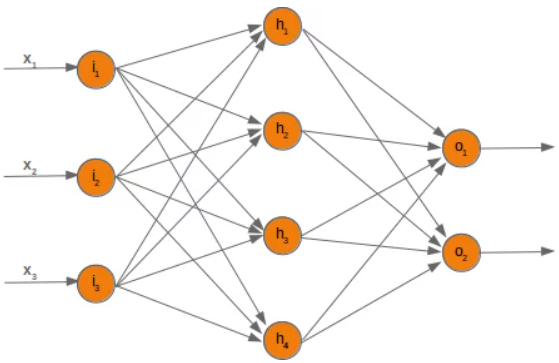



In [ ]:
import numpy as np

input_vector = np.array([2, 4, 11])
print(input_vector)

[ 2  4 11]


In [ ]:
import numpy as np

input_vector = np.array([2, 4, 11])
input_vector = np.array(input_vector, ndmin=2).T
print("The input vector:\n", input_vector)

print("The shape of this vector: ", input_vector.shape)

The input vector:
 [[ 2]
 [ 4]
 [11]]
The shape of this vector:  (3, 1)


# 2. Weights and Matrices
- 입력층-은닉층 사이 가중치 arrows <br>
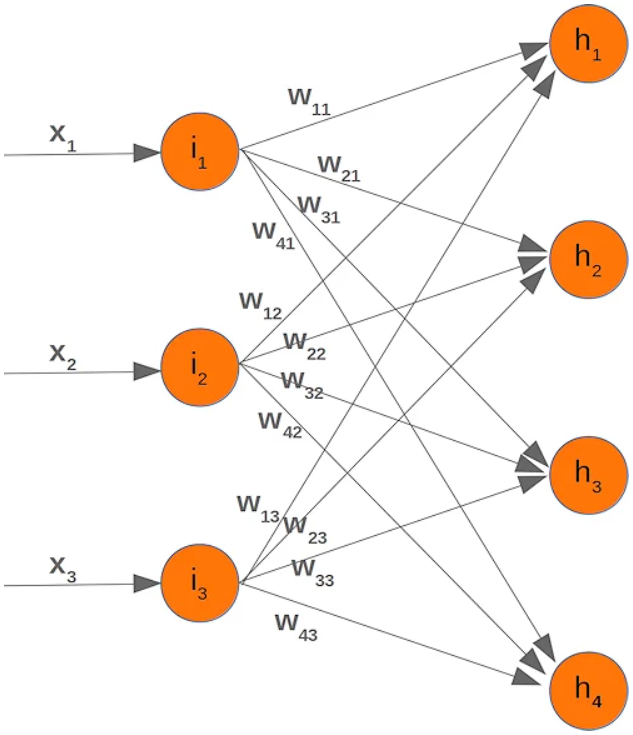
  - 예시 <br>
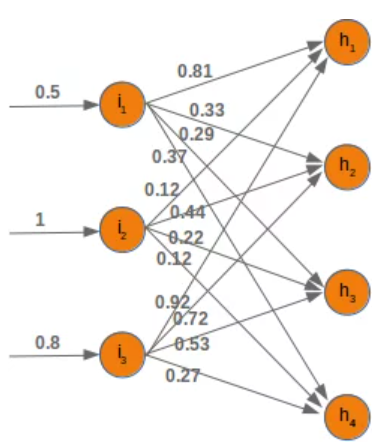


<계산을 용이하게 하기 위해 가중치 행렬 사용>
- wih: 가중치행렬 from input layer to hidden layer
- who: 가중치행렬 from input hidden layer to output layer <br>
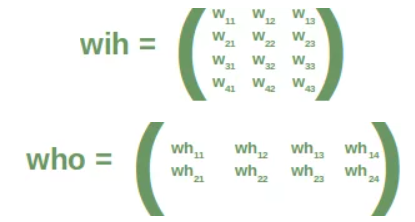 

<각 층 출력값 도식화>
- hidden layer 출력 <br>
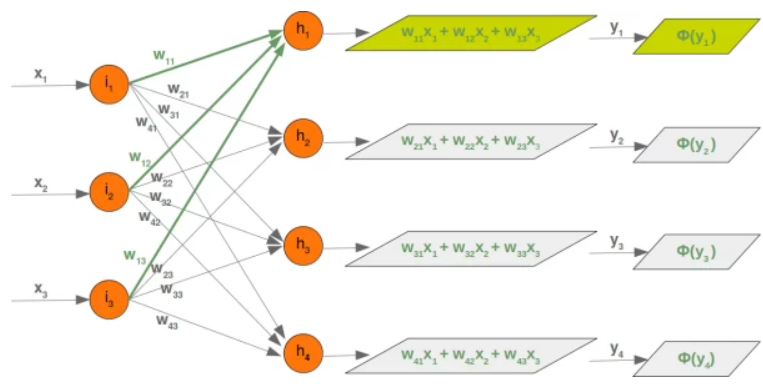
- output layer 출력 <br>
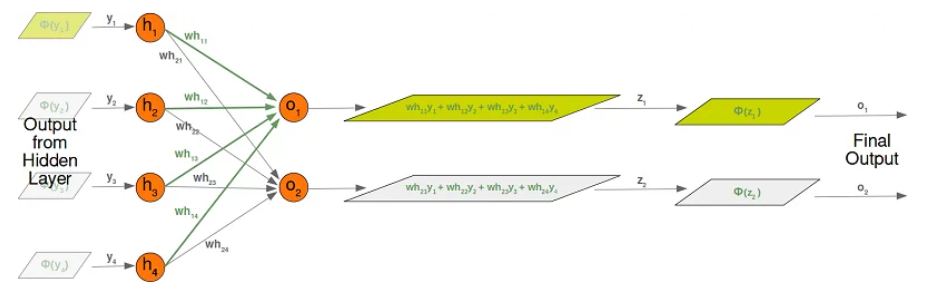

# 3. Initializing the weight matrices
- (입력노드를 제외하면) 모든 노드에서 아래 산식에 활성화함수를 적용한 값을 출력함
$$$$
- 따라서, 가중치가 0이면 값이 업데이트 되징 않고 계속 0이 되므로 초기값으로 0을 적용하면 안됨
- 1을 초기값으로 설정하는 것도 역시 좋지 않음
- **무작위로, randomly** 가중치 초기값 설정

In [ ]:
# 무작위 방법1) - unity function (균등분포)

import numpy as np

number_of_samples = 1200
low = -1
high = 0
s = np.random.uniform(low, high, number_of_samples)

# all values of s are within the half open interval [-1, 0) :
print(np.all(s >= -1) and np.all(s < 0))

True


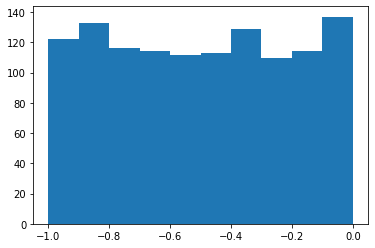

In [ ]:
import matplotlib.pyplot as plt
plt.hist(s)
plt.show()

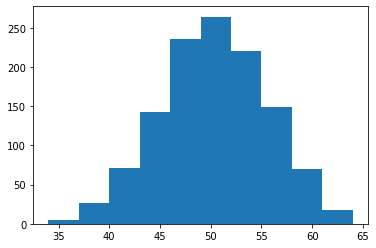

In [ ]:
# 무작위 방법2) - binomial 분포
# binomial(n,p,size): n번 시행해서 성공할 확률 p
s = np.random.binomial(100, 0.5, 1200)
plt.hist(s)
plt.show()

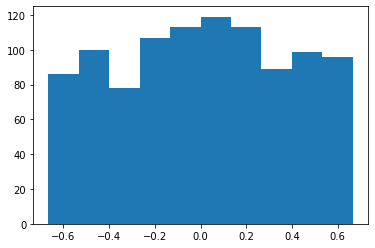

In [ ]:
# 무작위 방법3) - 정규분포 
'''
np.random.normal은 bound parameter 제공하지 않으므로 scipy.stats.truncnorm 사용
a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std
'''
from scipy.stats import truncnorm

s = truncnorm(a=-2/3., b=2/3., scale=1, loc=0).rvs(size=1000)

plt.hist(s)
plt.show()

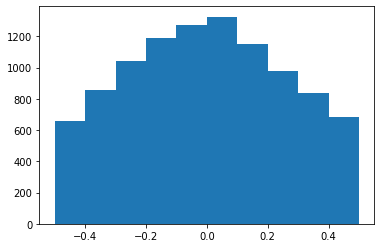

In [ ]:
# 무작위 방법3) - 정규분포
'''
truncnorm 사용이 어렵기 때문에 아래와 같이 사용자 정의 함수 사용
'''
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

X = truncated_normal(mean=0, sd=0.4, low=-0.5, upp=0.5)
s = X.rvs(10000)

plt.hist(s)
plt.show()

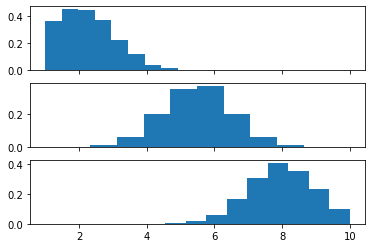

In [ ]:
X1 = truncated_normal(mean=2, sd=1, low=1, upp=10)
X2 = truncated_normal(mean=5.5, sd=1, low=1, upp=10)
X3 = truncated_normal(mean=8, sd=1, low=1, upp=10)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, sharex=True)
ax[0].hist(X1.rvs(10000), density=True)
ax[1].hist(X2.rvs(10000), density=True)
ax[2].hist(X3.rvs(10000), density=True)
plt.show()

- create the link weights matrix

In [ ]:
no_of_input_nodes = 3
no_of_hidden_nodes = 4
rad = 1 / np.sqrt(no_of_input_nodes)

X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
wih = X.rvs((no_of_hidden_nodes, no_of_input_nodes))
wih

array([[ 4.97173628e-01, -3.01747697e-01,  4.67773832e-01],
       [ 4.76667968e-04,  2.72910689e-01,  4.12453872e-01],
       [ 4.28367276e-01,  5.40333289e-01, -1.20961425e-01],
       [ 5.02005247e-01,  3.36229162e-01, -2.80766550e-01]])

In [ ]:
no_of_hidden_nodes = 4
no_of_output_nodes = 2
rad = 1 / np.sqrt(no_of_hidden_nodes)  # this is the input in this layer!

X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
who = X.rvs((no_of_output_nodes, no_of_hidden_nodes))
who

array([[ 0.40239056,  0.38291728, -0.3031615 ,  0.23103271],
       [-0.02956545,  0.36215475, -0.35373655,  0.3362787 ]])